In [1]:
%config InlineBackend.figure_format='retina'
import io

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
assignment2_datasets = [
    'covtype',
    'electricity',
    'RTG_2abrupt',
    'SEA_abrupt',
    'SEA_gradual',
]

In [3]:
filename_template = r'results/outputs.experiment1-bs1/exp1-2-{}-TE_rs{}-kappa.txt'
filename = filename_template.format('covtype', 3)
df = pd.read_csv(filename, index_col=0)

In [4]:
# columns = df.columns
# df[columns[1:]][1:].mean(axis=1)
# df[columns[:1]]
# df_mean = pd.concat([df[columns[:1]], df[columns[1:]][1:].mean(axis=1)], axis=1)
# df_mean.columns = ['Timestamp', 'Averaged Kappa']
# df_mean.set_index('Timestamp')
# df_mean
# df[columns[1:]][1:].mean(axis=1).plot()

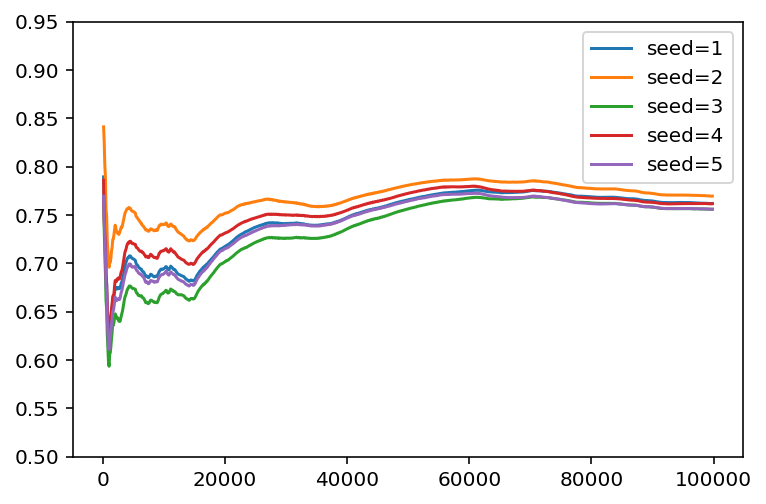

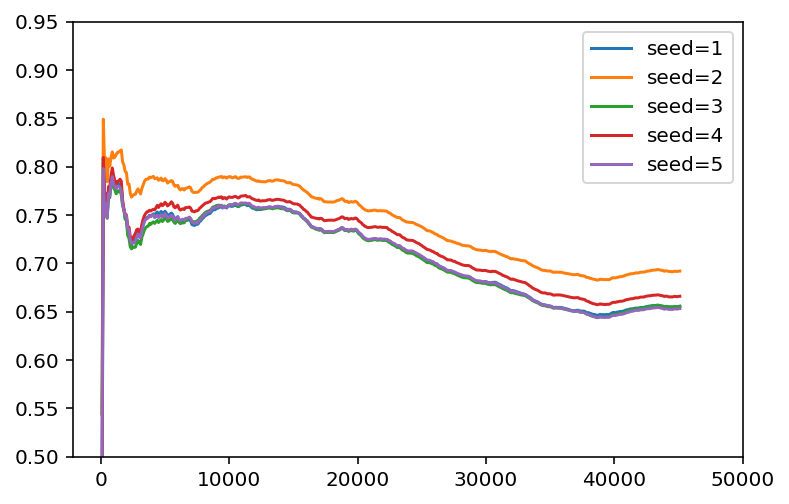

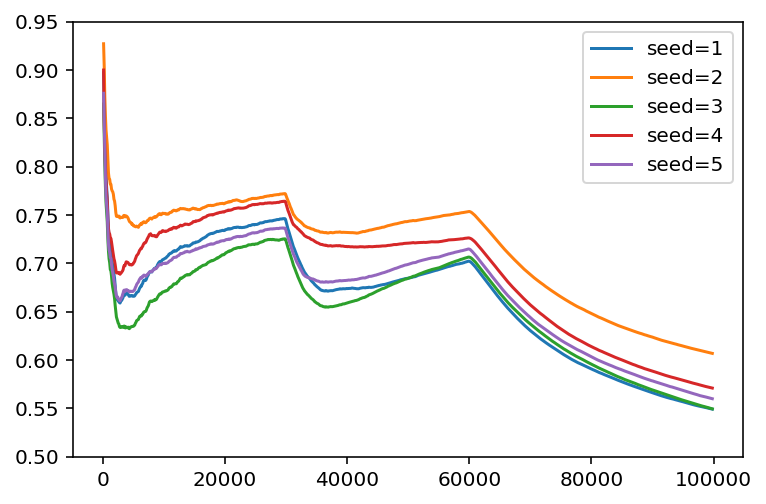

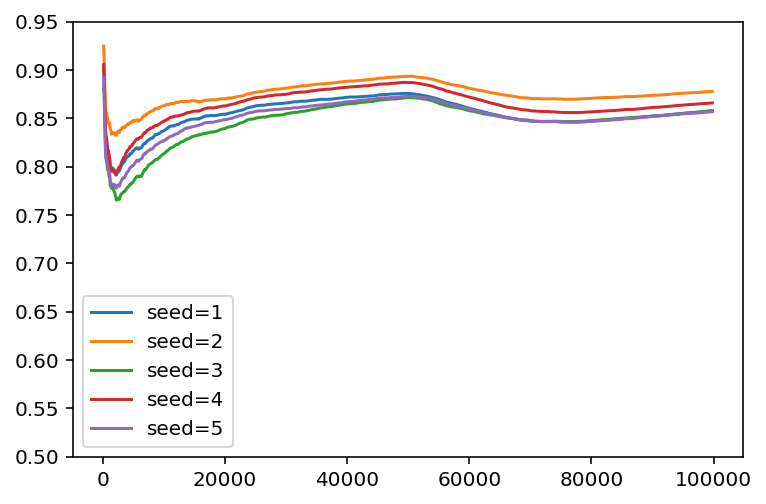

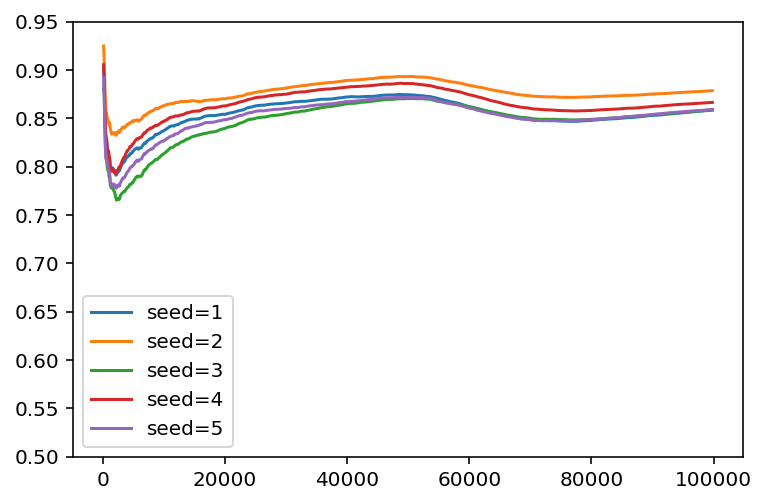

In [5]:
filename_template = r'results/outputs.experiment1-bs1/exp1-2-{}-TE_rs{}-kappa.txt'
for dataset in assignment2_datasets:
    means = []
    for seed in range(1, 6):
        filename = filename_template.format(dataset, seed)
        df = pd.read_csv(filename, index_col=0)
        columns = df.columns
        mean = df[columns[1:]][1:].mean(axis=1)
        means.append(mean)
    df_means = pd.concat(means, axis=1)
    df_means.columns = [f'seed={i}' for i in range(1, 6)]
    df_means.plot(ylim=(0.5, 0.95))

    if dataset == 'electricity':
        plt.xticks(ticks=range(0, 501, 100), labels=range(0, 50_001, 10_000))
    else:
        plt.xticks(ticks=range(0, 1001, 200), labels=range(0, 100_001, 20_000))
